

To initiate a session restart, go to Runtime > Restart Session. Occasionally, the impact of installed libraries may not be visible until a restart is performed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Transfer: Moving Data from Kaggle
We are using ***Heart Disease Dataset***  
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [ ]:
import kagglehub
johnsmith88_heart_disease_dataset_path = kagglehub.dataset_download('johnsmith88/heart-disease-dataset')

print('Data source import complete.')


## Load Data
load data in pandas dataframe

In [ ]:
################################################################################
## TODO: load and display dataframe
################################################################################
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Explore data by Panda

shape of dataset is: (1190, 12)
--------------------------------------------------
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
This dataset has no missing values.
--------------------------------------------------
target
1    629
0    561
Name: count, dtype: int64
--------------------------------------------------
--------------------- Plots --------------------------


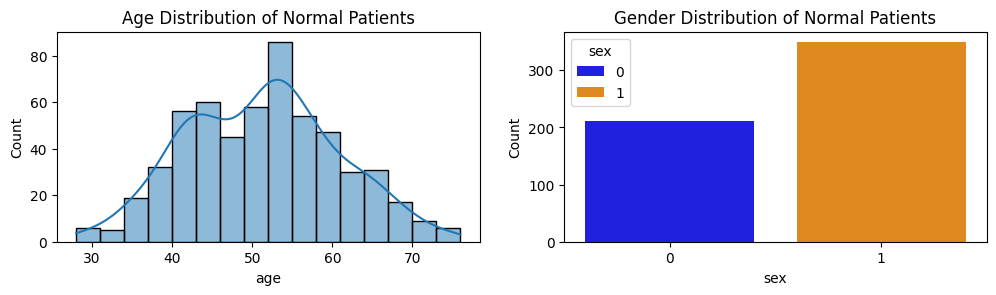

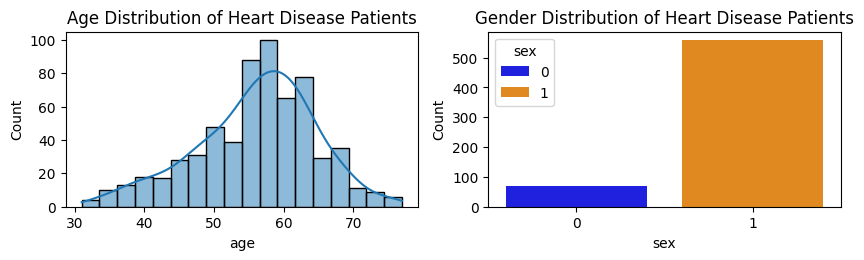

In [ ]:
#############################################################################
## TODO: Find the shape of the dataset.
#############################################################################
# [use this]
print(f"shape of dataset is: {df.shape}")
print("--------------------------------------------------")
#############################################################################
## TODO: Check if there are missing entries in the dataset columnwise.
#############################################################################
missing_entries = df.isnull().sum()
if missing_entries.sum() == 0:
    print(df.isnull().sum())
    print("This dataset has no missing values.")
else:
    print(df.isnull().sum())
    print("This dataset has missing values.")
print("--------------------------------------------------")



#############################################################################
## TODO: Check number of positive and negative cases
#############################################################################
target = df['target'].value_counts()
print(target)
print("--------------------------------------------------")


#############################################################################
## TODO: plot  age distribution and gender distribution for both normal
## and heart disease patients. (2*2 plots)
#############################################################################

print("--------------------- Plots --------------------------")


norm_patient = df[df['target'] == 0]
heart_disease_patient = df[df['target'] == 1]


plt.figure(figsize=(12, 6))
# ========= Normal Patient distributions =========

# Age Dist
#          (#ROWS , #COLS, INDEX)
plt.subplot(2, 2, 1)
sns.histplot(data=norm_patient, x='age', kde=True)
plt.title('Age Distribution of Normal Patients')

# Sex Dist
plt.subplot(2, 2, 2)
sns.countplot(x='sex', hue='sex', data=norm_patient, palette=[ 'blue' , 'darkorange'])
# sns.countplot(x='sex', data=norm_patient)

plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Gender Distribution of Normal Patients')
# plt.show()


# ========= Heart Disease distribution =========
# Age Dist
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 3)
sns.histplot(data=heart_disease_patient, x='age' , kde=True)
plt.title('Age Distribution of Heart Disease Patients')

# Sex Dist
plt.subplot(2, 2, 4)
sns.countplot(x='sex', hue='sex', data=heart_disease_patient, palette=[ 'blue' , 'darkorange'])

plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Gender Distribution of Heart Disease Patients')
plt.show()






## Split Data


In [ ]:
from sklearn.model_selection import train_test_split
#############################################################################
## TODO: split dataframe into 4 dataframe X_train, X_test, y_train, y_test
## test(30%) train(70%)
# Assuming df is your DataFrame and 'target_column' is your target variable
# Split the data into training and testing sets with 0.7 to 0.3 ratio
#############################################################################

# [use this]
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
y_train = train_set['target']
X_train = train_set.drop('target', axis=1)

y_test = test_set['target']
X_test = test_set.drop('target', axis=1)

X_train
#.drop(...
#axis = 1 is for columns
#axis = 0 is for rows

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
996,39,1,4,118,219,0,0,140,0,1.2,2
852,62,0,4,160,164,0,2,145,0,6.2,3
478,61,1,4,110,0,1,0,108,1,2.0,3
1004,35,0,4,138,183,0,0,182,0,1.4,1
875,64,1,3,140,335,0,0,158,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1044,58,1,4,125,300,0,2,171,0,0.0,1
1095,55,1,2,130,262,0,0,155,0,0.0,1
1130,61,1,1,134,234,0,0,145,0,2.6,2
860,62,0,4,140,268,0,2,160,0,3.6,3


## Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.

In [ ]:
from sklearn.preprocessing import StandardScaler
#############################################################################
## TODO: Normalize numerical features
## Note that just numerical features should be normalized.
## Type of features is determined in dataset description file.
# Create a StandardScaler instance
# Fit to numerical columns of train and transform test and train based on this
## Warning:
## You can't fit your Scaler on whole data. Fit should be just on Train data.
# Print the first few rows to check the result
#############################################################################
# [use this]
# # Assuming x_train is your DataFrame containing the numerical features
num_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

scaler = StandardScaler() # Create a StandardScaler instance

# Fit to numerical columns of train and transform test and train based on this
scaler.fit(X_train[num_cols]) # ".fit" is for not model learning . this calculates the mean and std

X_test[num_cols] = scaler.transform(X_test[num_cols]) #just so train data has mean=0 and std=1
X_train[num_cols] = scaler.transform(X_train[num_cols]) #just so test data has mean=0 and std=1X_test

print(X_train.head(5))


# for the entire data sets to be scaled and transformed too
train_set = pd.concat([X_train, y_train], axis = 1)
test_set = pd.concat([X_test, y_test], axis = 1)

#############################################################################
# [MinMaxScaler]:
# This scaler works by scaling to a given range of typically 0 and 1, for each feature of the training set.
# It is used instead of the zero-mean normalization. This scaler, transforms each data to the range
# training data, and makes the smallest value to be close to a min of the entire range and the biggest value to the close to the max of the
# entire data range. But with this efforts it still does not reduce the effect of the outliers. Outliers have a major effect on the scaling.
# It is mostly used for preservation of relationships, keeping data within a bounded range (0 to 1) for mathematical and statistical interpretations.
#
# [RobustScaler]:
# Unlike the MinMaxScaler this scaler is Robust to the outliers. Essentially it preserves the structure of the data while reducing the impact of outliers on the scaling.
# It does this by removing the median and scales the data according to the interquartile range (IQR), which is the range between the 25th and 75th percentiles.
# This scaler transforms each data point based on the median and IQR of the training data, ensuring that the median becomes 0 and the IQR becomes 1. By using the median
# and IQR, this method reduces the effect of outliers, making it easily suitable for datasets with many outliers such that data with extreme values.
##################################################################################


           age  sex  chest pain type  resting bp s  cholesterol  \
996  -1.566106    1                4     -0.757118     0.070043   
852   0.877897    0                4      1.522053    -0.496223   
478   0.771636    1                4     -1.191245    -2.184727   
1004 -1.991150    0                4      0.328202    -0.300604   
875   1.090419    1                3      0.436733     1.264351   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
996                     0            0       -0.024287                0   
852                     0            2        0.176820                0   
478                     1            0       -1.311377                1   
1004                    0            0        1.665018                0   
875                     0            0        0.699701                0   

       oldpeak  ST slope  
996   0.288497         2  
852   4.894054         3  
478   1.025386         3  
1004  0.472719         1  
875  -0.816

### plot correlations

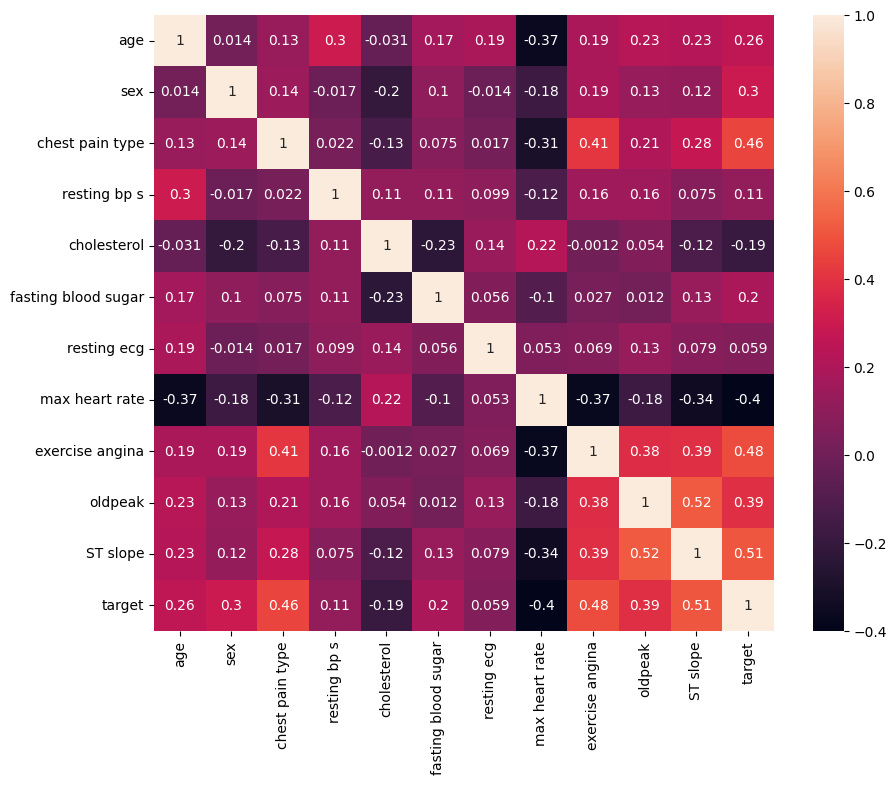

In [ ]:
#############################################################################
## TODO: Make a temp dataframe with X_train and Y_train.
## plot correlation between all features
#############################################################################
# [use this]
# CONCYATTTTTT([df, df]) ===> df
df_temp = pd.concat([X_train, y_train], axis = 1) # axis = 1 --> concat by columns |X|+|Y|

## plot correlation between all features
matrix = df_temp.corr()
# width, height = plt.subplots(10 x 8)
width, height = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.show()




## Define a classification report function


In [ ]:
# [use this]
def classification_report(y_true, y_pred):

  # - Accuracy: Ratio of correct predictions to total samples.
  #   Accuracy = (TP + TN) / (TP + TN + FP + FN)
  correct_predictions = 0
  for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
      correct_predictions += 1
  Accuracy = correct_predictions / len(y_true)


  #===========================================================================================
  # - Precision: Accuracy of positive predictions(y^s) among all predicted positives(in all ys (because we "predicted them before" it)).
  #   Precision: # of ys(=1) / # of y^s(=1 right or wrong)


  positive_pred = 0
  preded_positive = 0  #predED it before, as positive (good old TRUTH)
  for i in range(len(y_pred)):
    if y_pred[i] == 1:  # [AMONG ALL] check what model predicted y^s(=1)
      positive_pred += 1 # [AMONG ALL] REGARDLESS of FP or TP we add them up
       #then on each find ...
      if y_true[i] == 1:  # ... we check model positive with good old truth ys(=1)
        preded_positive += 1 #  TP --> (b/c y^(i)=1 and y(i)=1 too)

  #[AMONG ALL]: Check the AMONG ALL ones first then check the condition. Niddle in heistack (u check heistack first ---> to see each haistack is niddle or not)
  # AMONG ALL = Out of

  # Calculate Precision
  # since (positive_pred =might= 0) -> the denominator of our general prediction function might be 0.
  if positive_pred == 0:     # Avoid division by zero
      Precision = 0
  else:
      Precision = preded_positive / positive_pred

  #===========================================================================================
  #    - Recall: Ability to capture actual positives among all actual positives
  #      Recall = TP / (TP + FN)
  actual_positive =0
  for i in range(len(y_true)): # [AMONG ALL]
    if y_true[i] == 1:  # [AMONG ALL] check what model predicted y^s(=1)
      actual_positive +=1

 # Calculate Recall
  if actual_positive == 0:     # Avoid Recall by zero
      Recall = 0
  else:
      Recall = preded_positive / actual_positive
  #===========================================================================================
  #    - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
  #      F1 score = 2 * (Precision * Recall) / (Precision + Recall)

  # Calculate F1score
  # if Precision * Recall == 0:     # Avoid division by zero
  if Precision + Recall == 0:     # Avoid division by zero

      F1score = 0
  else:
      F1score = 2 * (Precision * Recall) / (Precision + Recall)
  #===========================================================================================
  #    - FNR: Proportion of actual positives incorrectly predicted as negatives.
  #      FNR = FN / (actual positive = TP + FN)
  # false_negative = actual_positive - true_positive
  false_negative = 0

  for i in range(len(y_pred)):
    if (y_pred[i] == 0 and y_true[i] == 1):
      false_negative +=1

  # Calculate FNR
  # if false_negative == 0:     # Avoid division by zero
  if actual_positive == 0:     # Avoid division by zero

      FNR = 0
  else:
      FNR = false_negative / actual_positive




  result = {
      'Accuracy:' : Accuracy,
      'Precision:' : Precision,
      'Recall:' : Recall,
      'F1score:': F1score,
      'FNR:': FNR

  }

  return result

# Test Case 1: Perfect predictions
y_true_1 = [1, 0, 1, 0]
y_pred_1 = [1, 0, 1, 0]
result_1 = classification_report(y_true_1, y_pred_1)
print(result_1)


# Test Case 2: Imperfect predictions
y_true_2 = [1, 0, 1, 0]
y_pred_2 = [0, 1, 1, 1]

result_2 = classification_report(y_true_2, y_pred_2)
print(result_2)

{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}
{'Accuracy:': 0.25, 'Precision:': 0.3333333333333333, 'Recall:': 0.5, 'F1score:': 0.4, 'FNR:': 0.5}


## Model Traning


### Covert data to numpy


In [ ]:
#############################################################################
## TODO: convert X_train, X_test, y_train, y_test to numpy array
#############################################################################
X_train  = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Train Logistic Regression

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8725490196078431, 'Recall:': 0.8768472906403941, 'F1score:': 0.8746928746928747, 'FNR:': 0.12315270935960591}


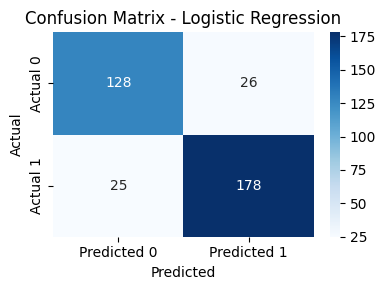

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#############################################################################
## TODO: Train a Logistic Regression Model and test your model.
## give a test report from test result by above classification_report function
## Plot the confusion matrix using seaborn
#############################################################################

#====================Train a Logistic Regression Model and test your model.===============================================
# log_reg = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) # trained with training data

# Now we deal with testing data
y_test_pred_lg = log_reg.predict(X_test) # [!] y^ = predict(x-TEST)
                                         #     J-test not J-train


#====================Give a test report from test result by above classification_report function==========================
# [!] report is only for J-test
report = classification_report(y_test, y_test_pred_lg) # [!] Report J-test (y-test, models y^-test)
print(report)

#====================Plot the confusion matrix using seaborn==============================================================
cm = confusion_matrix(y_test, y_test_pred_lg)

width, height = plt.subplots(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' , xticklabels=['Predicted 0', 'Predicted 1'],
                                                    yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


### Train KNN

{'Accuracy:': 0.8403361344537815, 'Precision:': 0.8443396226415094, 'Recall:': 0.8817733990147784, 'F1score:': 0.8626506024096386, 'FNR:': 0.11822660098522167}


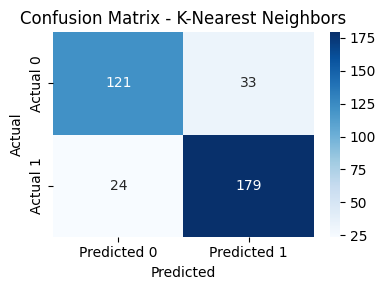

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#############################################################################
## TODO: Train a KNN Model and test your model.
## give a test report from test result by above classification_report function
## plot confusion matrix
#############################################################################

#====================Train a Logistic Regression Model and test your model.===============================================
knn = KNeighborsClassifier() # knn instance
knn.fit(X_train, y_train) # train witn (x-train, y-train)

y_test_pred_knn = knn.predict(X_test) # predict y^-test = knn(x-test)

#====================Give a test report from test result by above classification_report function==========================
# [!] report is only for J-test
report = classification_report(y_test, y_test_pred_knn) # reportr
print(report)

cm = confusion_matrix(y_test, y_test_pred_knn)

width, height = plt.subplots(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' , xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0'   , 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.tight_layout()
plt.show()




### Train a safer model

To make sure our model doesn"t make dangerous mistakes, like saying a high-risk patient is healthy, we can use the class_weight option in LogisticRegression(). If the model wrongly thinks a healthy person is high-risk, it"s not as big of a problem and doctors will check it!

🏁

{'Accuracy:': 0.8263305322128851, 'Precision:': 0.7877551020408163, 'Recall:': 0.9507389162561576, 'F1score:': 0.8616071428571428, 'FNR:': 0.04926108374384237}


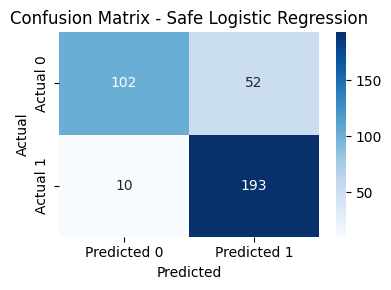

In [ ]:
#############################################################################
## TODO: create a safer model with class_weight use your own weight result is not important
## plot confusion matrix
#############################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve
# [use this]
# It penalizes mistakes in samples of class[i] with class_weight[i] instead of 1. So higher class-weight means you want to put more emphasis on a class.
log_reg = LogisticRegression(class_weight={0: 20, 1: 60})

log_reg.fit(X_train, y_train)
y_test_pred_slg = log_reg.predict(X_test)


report = classification_report(y_test, y_test_pred_slg)
print(report)

cm = confusion_matrix(y_test, y_test_pred_slg)

width, height = plt.subplots(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' , xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Safe Logistic Regression")
plt.tight_layout()
plt.show()



### Cross Validation Score

In [ ]:
# [use this]
from sklearn.model_selection import cross_validate
#############################################################################
## TODO: research  about "K-Fold cross validation"
## cross validate your KNN model to evaluate your model better
## use accuracy and recall to report cross validation results
#############################################################################
cv_accuracy = cross_validate(knn, X_train, y_train, scoring='accuracy')
cv_recall = cross_validate(knn, X_train, y_train, scoring='recall')

mean_accuracy = np.mean(cv_accuracy['test_score'])
mean_recall = np.mean(cv_recall['test_score'])


print(f"KNN Acc:  {mean_accuracy}")
print(f"KNN Recall:  {mean_recall}")

KNN Acc:  0.8415265853834499
KNN Recall:  0.8473871409028728


### Hyperparameter Tuning Using GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#############################################################################
## TODO: Explore GridSearchCV functionality to identify the best parameters
## (n_neighbors, weights, p) for your KNN model.
#############################################################################
# [use this]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 14, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
    }


grid_search = GridSearchCV(knn, param_grid) # prepare for tuning
grid_search.fit(X_train, y_train) # tuning



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 14, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
#############################################################################
## TODO: Retrieve the best model and its parameters
#############################################################################
# [use this]
# best_knn = grid_search.best_estimator_ #best model
                                       #can later say "best_knn.predict(...)"

# best parameters
print(f"Best Parameters: {grid_search.best_params_}")
# best accuracy
print(f"Best Accuracy: {grid_search.best_score_}")


Best Parameters: {'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.9135632349758314


### Cross Validation Score on Result of Gride Search

In [ ]:
#############################################################################
## TODO: Do again "K-Fold cross validation" on best KNN model of the Gride Search
#############################################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


# K-Fold cross validation
cv_accuracy = cross_validate(knn, X_train, y_train, scoring='accuracy')
cv_recall = cross_validate(knn, X_train, y_train, scoring='recall')

mean_accuracy = np.mean(cv_accuracy['test_score'])
mean_recall = np.mean(cv_recall['test_score'])

print(f"Grid Search KNN Accuracy:  {mean_accuracy}")
print(f"Grid Search KNN Recall:  {mean_recall}")


Grid Search KNN Accuracy:  0.8415265853834499
Grid Search KNN Recall:  0.8473871409028728


### Is the aforementioned KNN model (Best KNN) fair?
Evaluate that model perform equally on men and women or not.

In [ ]:
#############################################################################
## TODO: split your test data on two split of women and men and give
## classification_report on them.
#############################################################################

best_knn = KNeighborsClassifier(n_neighbors= grid_search.best_params_['n_neighbors'] # knn instance
                                , p= grid_search.best_params_['p']
                                , weights= grid_search.best_params_['weights'])

# best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train, y_train) # train witn (x-train, y-train)

y_test_pred_best_knn = best_knn.predict(X_test)

#test_set MUST concat(X_test,y_test) because of standard scaling on each earlier

# WOMEN
test_women = test_set[test_set['sex'] == 0]
X_test_women = test_women.drop('target', axis=1).to_numpy()
y_test_women = test_women['target'].to_numpy()

y_test_pred_best_knn_women = best_knn.predict(X_test_women)
report = classification_report(y_test_women, y_test_pred_best_knn_women)
print("Performance of best KNN model for  sex_group of '0.0' :")
print(report)


# MEN
test_men = test_set[test_set['sex'] == 1]
X_test_men = test_men.drop('target', axis=1).to_numpy()
y_test_men = test_men['target'].to_numpy()

y_test_pred_best_knn_men = best_knn.predict(X_test_men)
report = classification_report(y_test_men, y_test_pred_best_knn_men)
print("Performance of best KNN model for  sex_group of '1.0':")
print(report)





#############################################################################
# The model performance is showing that it predicts the highly risky probability of heart attack cases
# differently for men and for women. Especially the performance parameter of FNR (False Negative Rate)
# is different in men and women. The FNR in the case of the task of this model is crucial,
# since FNR measures how many actual positive cases of heart attack occuring were MISSED by the model.
# missing a heartattack diagnosis is extremely risky and can have severe consequences.
# The results indicate that the FNR for women (0.1111111111111111) is HIGHER than for men (0.05945945945945946),
# suggesting that the model misses more heart attack cases for WOMEN. This difference can be because of to number of
# reasons such as, training data itself with physiological differences in men and women, the way the symptoms of heart attack
# presents in women and men might be different, data collection issues and biases in training data.
# This issue suggests that depending on the task of the model, how crucial the context of gender matters and can have life and death outcomes.
#############################################################################

Performance of best KNN model for  sex_group of '0.0' :
{'Accuracy:': 0.918918918918919, 'Precision:': 0.8, 'Recall:': 0.8888888888888888, 'F1score:': 0.8421052631578948, 'FNR:': 0.1111111111111111}
Performance of best KNN model for  sex_group of '1.0':
{'Accuracy:': 0.9151943462897526, 'Precision:': 0.93048128342246, 'Recall:': 0.9405405405405406, 'F1score:': 0.935483870967742, 'FNR:': 0.05945945945945946}


### Ensemble Leanrning

First read the first part of this blog
https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics

#############################################################################
## TO-DO: Implement a Stacking Classifier Ensemble for Model Selection
## 1. Utilize a Logistic Regression, the best K-Neighbors Classifier,
##    Support Vector Machine (SVM), Soft-margin SVM, Decision Tree,
##    Random Forest, and Naive Bayes as base classifiers.
## 2. Designate a Logistic Regression as the Meta-Classifier.
## 3. Utilize 3-fold cross-validation for model evaluation.
## 4. Assess models' performance on the test set.
#############################################################################

# Add RandomForest
from sklearn.ensemble import RandomForestClassifier

# Define classifiers
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = SVC(C=1.0)  # SVM (overfit)
clf4 = SVC(C=0.6)  # Soft-margin SVM (less)
clf5 = DecisionTreeClassifier()
clf6 = RandomForestClassifier()
clf7 = GaussianNB()
lr = LogisticRegression()



# StackingCVClassifier
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5, clf6, clf7],
                            meta_classifier=lr,
                            random_state=42)




print("Evaluation on the test set:\n")
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, sclf],
                      ['BEST KNN',
                       'LR',
                       'SVM',
                       'SoftSVM',
                       'DecisionTree',
                       'Random Forest',
                       'NaiveBayes',
                       'Ensemble Classifier']):
    clf.fit(X_train, y_train)
    ## 3. Utilize 3-fold cross-validation for model evaluation.
    scores = model_selection.cross_val_score(clf, X_train, y_train,
                                              cv=3, scoring='accuracy')

    print("Accuracy: %0.2f on %s" % (scores.mean(),  label))



Evaluation on the test set:

Accuracy: 0.82 on BEST KNN
Accuracy: 0.81 on LR
Accuracy: 0.83 on SVM
Accuracy: 0.82 on SoftSVM
Accuracy: 0.81 on DecisionTree
Accuracy: 0.90 on Random Forest
Accuracy: 0.83 on NaiveBayes
Accuracy: 0.89 on Ensemble Classifier


### ROC
read about AUC ROC form this link:
https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
and plot ROC Curve for ensembel model.

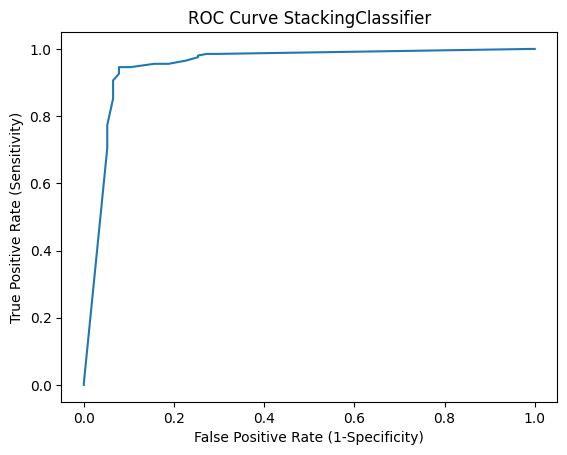

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
# [x] comment
#############################################################################
## TODO: plot roc_curve for Ensemble model you created previously
#############################################################################
# We Predict probabilities of classes for STACKCLF w/ testing data

# When using "sclf.pred(X_test) the ROC Curve will only have “1”s and “0”s to calculate the variables, so the ROC Curve will be an approximation.
# To avoid this effect and get more accurate results it is advisable to use "sclf.predict_proba(X_test)" and get the probabilities of class “1”,
# when calculating the ROC AUC:
y_proba_scores = sclf.predict_proba(X_test)[:, 1]
# the target gives 0 or 1 so the classes are binary, hence the y_proba will be a 2D array
# with  [[ probability of 0(negative class)] or , [ probability of 1(positive class)]] happening for each sample of testing data.

# We compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_scores, pos_label=1) # we get the FP and TP for graph
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
# plot
plt.title("ROC Curve StackingClassifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()


# #############################################################################

# #  The metrics such as accuracy are just a single number and while they are crucial
# #  for the evaluation of the model's performance, but what ROC curve demonstrates is
# #  showing the performance of the model across various points and especially where
# #  the Sensitivity and Specificity become optimal (close to 1) and how well the model
# #  classifies within different points. This trend-style of demonstration is better than,
# #  for example accuracy, especially when we have imbalanced dataset and one value of accuracy
# #  can be very misleading for our classifier.
# #
# #############################################################################